Objectif

Ce projet nécessite de développer une segmentation de la clientèle pour définir la stratégie marketing. L’exemple de jeu de données résume le comportement d’utilisation d’environ 9000 détenteurs de cartes de crédit actifs au cours des 6 derniers mois. Le fichier est au niveau du client avec 18 variables comportementales.

Voici le dictionnaire de données pour l’ensemble de données de cartes de crédit :

CUST_ID : Identification du titulaire de la carte de crédit (catégorique)

SOLDE : Solde restant sur son compte pour effectuer des achats (BALANCE_FREQUENCY : Fréquence de mise à jour du Solde, score compris entre 0 et 1 (1 = fréquemment mis à jour, 0 = pas fréquemment mis à jour)

ACHATS : Montant des achats effectués à partir du compte

ONEOFF_PURCHASES : Montant maximum de l’achat effectué en une seule fois

INSTALLMENTS_PURCHASES : Montant de l’achat effectué en plusieurs fois

CASH_ADVANCE : Encaissement à l’avance donné par l’utilisateur

PURCHASES_FREQUENCY : La fréquence des achats, score compris entre 0 et 1 (1 = achats fréquents, 0 = achats peu fréquents)

ONEOFFPURCHASESFREQUENCY: La fréquence des achats en une seule fois (1 = fréquemment achetés, 0 = pas fréquemment achetés)

ACHATSVERSEMENTSFRÉQUENCE : fréquence des achats échelonnés (1 = fréquemment effectué, 0 = pas fréquemment)

CASHADVANCEFREQUENCY: À quelle fréquence l’avance de fonds est payée

CASHADVANCETRX: Nombre de transactions effectuées avec le PURCHASES_TRX « Cash in Advanced »: Nombre de transactions d’achat effectuées

CREDIT_LIMIT: Limite de carte de crédit pour l’utilisateur

PAIEMENTS: Montant du paiement effectué par userMINIMUM_PAYMENTS: Montant minimum des paiements effectués par l’utilisateur PRCFULLPAYMENT: Pourcentage du paiement intégral payé par l’utilisateurTENURE: Durée du service de carte de crédit pour l’utilisateur

Instructions
                                                                
Chargez votre jeu de données.
Utilisez le clustering hiérarchique pour identifier les regroupements inhérents à vos données.
Tracez les clusters.
Tracez le dendrogramme. Utilisez le clustering k-means.
Essayez différentes valeurs k et sélectionnez la meilleure.
Tracez les clusters.
Comparez les deux résultats.
Bonus : recherche d’une autre métrique de validation

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# CHARGER LE JEU DE DONNEE

In [133]:
df = pd.read_csv('CC GENERAL.csv',sep="," )
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [134]:
#copie du dataset
df2 = df.copy() 

In [135]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

(8950, 18)

In [136]:
df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Nettoyage des donnees et selection des fonctionalites

In [137]:
#recherche de valeurs manquantes
df2.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [138]:
#recherche de doublons
df2.duplicated().sum()

0

In [139]:
#remplacer les valeurs manquantes de la variable MINIMUM_PAYMENTS
df2['MINIMUM_PAYMENTS'].fillna(method='ffill',inplace=True)
#remplacer les valeurs manquantes de la variable CREDIT_LIMIT
df2['CREDIT_LIMIT'].fillna(method='ffill',inplace=True)

In [140]:
df2.duplicated().sum()

0

# Utilisez le clustering hiérarchique pour identifier les regroupements inhérents à vos données

# Clustering Preprocessing

In [141]:
df2=df2.drop("CUST_ID",axis=1)

In [142]:
#Clustering agglomératif
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df2)  
#Étiquette agglomérative
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


# Graphique en grappes agglomératives

    Tracé contenant les grappes.
    Chaque groupe coloré représente un cluster.

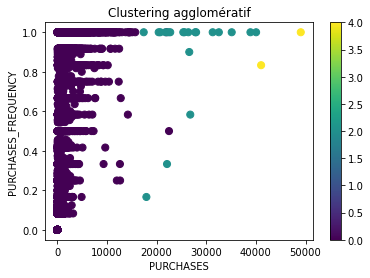

In [143]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df2['PURCHASES'] , df2["PURCHASES_FREQUENCY"] , c= agglomerative[0], s=50)
ax.set_title("Clustering agglomératif")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("PURCHASES_FREQUENCY")
plt.colorbar(scatter)

Interprétation des grappes agglomératives

    Les clients en vert: ont un petit revenu annuel mais ils ont tendance à dépenser beaucoup. 
    Clients en jaune: Les clients ayant une forte frequence d'achat par carte de credit et qui dépensent  beaucoup. 
    Clients en violet: Clients ayant une forte frequence d'achat par carte de credit   mais qui ne dépensent pas beaucoup. 

# Visualisation du dendrogramme

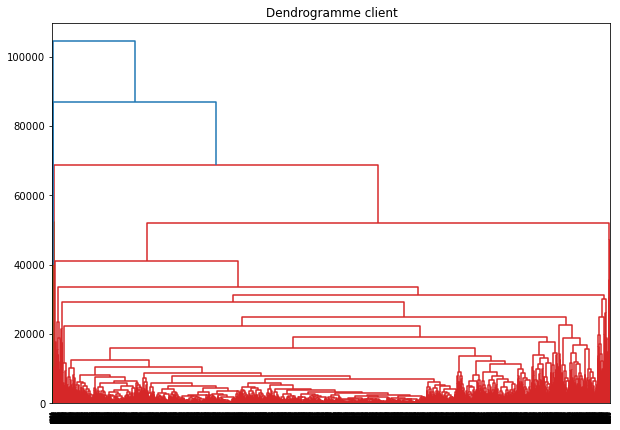

In [144]:
plt.figure(figsize=(10,7))
plt.title("Dendrogramme client")
dend=shc.dendrogram(shc.linkage(df2, method="complete"))

# Appliquer K-means clustering.

In [145]:
kmeans=KMeans(n_clusters=5, random_state=0)  #Regrouper nos données en choisissant 5 comme nombre de clusters
kmeans.fit(df2)

KMeans(n_clusters=5, random_state=0)

# K-means Étiquettes

In [146]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,2
2,2
3,2
4,1
...,...
8945,1
8946,1
8947,1
8948,1


l’étiquette de chaque point de nos données une fois le clustering terminé.

# K-Means Centroïdes

In [148]:
kmeans.predict(df2)
print(kmeans.cluster_centers_) 

[[5.67580385e+03 9.53344460e-01 2.71978584e+03 1.70857319e+03
  1.01134118e+03 4.58349071e+03 5.33053009e-01 3.33709964e-01
  4.07242760e-01 3.24049064e-01 1.03901734e+01 3.32803468e+01
  1.13969719e+04 6.61627282e+03 2.08454903e+03 1.14437236e-01
  1.17239884e+01]
 [7.97644251e+02 8.50996122e-01 5.23239948e+02 2.57762714e+02
  2.65768285e+02 4.87328993e+02 4.54115400e-01 1.33929692e-01
  3.48230922e-01 1.09032486e-01 2.28872610e+00 9.69394318e+00
  2.27017817e+03 9.19682094e+02 5.16350747e+02 1.48719549e-01
  1.13884224e+01]
 [2.03592595e+03 9.11919171e-01 1.34044256e+03 8.32889608e+02
  5.07928991e+02 1.07577709e+03 5.54287155e-01 3.14024012e-01
  3.83131865e-01 1.42663880e-01 3.43400621e+00 1.94988354e+01
  7.36740542e+03 1.93473470e+03 7.66239733e+02 1.75331243e-01
  1.17321429e+01]
 [3.79095337e+03 9.28977283e-01 9.76931000e+02 1.11830167e+02
  8.65100833e+02 8.83993764e+02 4.57007550e-01 3.86994500e-02
  4.26767700e-01 1.00694400e-01 2.83333333e+00 1.75666667e+01
  4.15833333e+03

Chaque liste interne représente les coordonnées d’un centre de cluster.
ici nous avons choisi k = 5 alors nous aurons 5 centres.

# Tracé K-means
    Tracé contenant les grappes.
    Chaque groupe coloré représente un cluster.

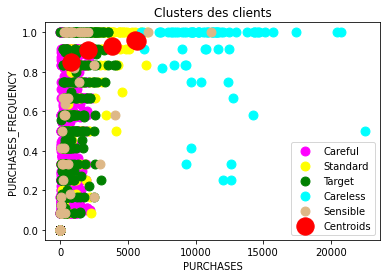

In [149]:
plt.scatter(df2["PURCHASES"][label == 0],df2["PURCHASES_FREQUENCY"][label == 0],s=80,c='magenta',label='Careful')
plt.scatter(df2["PURCHASES"][label == 1],df2["PURCHASES_FREQUENCY"][label == 1],s=80,c='yellow',label='Standard')
plt.scatter(df2["PURCHASES"][label == 2],df2["PURCHASES_FREQUENCY"][label == 2],s=80,c='green',label='Target')
plt.scatter(df2["PURCHASES"][label == 3],df2["PURCHASES_FREQUENCY"][label == 3],s=80,c='cyan',label='Careless')
plt.scatter(df2["PURCHASES"][label == 4],df2["PURCHASES_FREQUENCY"][label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters des clients')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')
plt.legend()
plt.show()

In [150]:
sum_of_squared_distances = []
K = range(1,17)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df2)
    sum_of_squared_distances.append(km.inertia_)

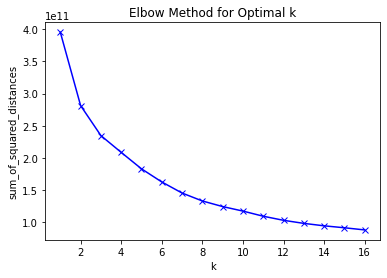

In [151]:
plt.plot(K,sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal K=2.

In [ ]:
#Clustering agglomératif
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df2)  
agglomerative=pd.DataFrame(clust_labels)
agglomerative

In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df2['PURCHASES'] , df2["PURCHASES_FREQUENCY"] , c= agglomerative[0], s=50)
ax.set_title("Clustering agglomératif")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("PURCHASES_FREQUENCY")
plt.colorbar(scatter)

# Tracé K-means apres modification de k
    Tracé contenant les grappes.
    Chaque groupe coloré représente un cluster.

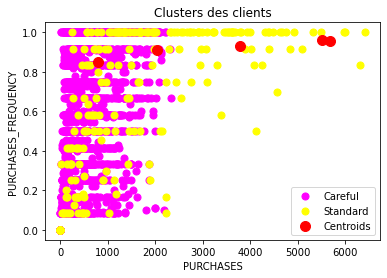

In [152]:
plt.scatter(df2["PURCHASES"][label == 0],df2["PURCHASES_FREQUENCY"][label == 0],s=50,c='magenta',label='Careful')
plt.scatter(df2["PURCHASES"][label == 1],df2["PURCHASES_FREQUENCY"][label == 1],s=50,c='yellow',label='Standard')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids')
plt.title('Clusters des clients')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')
plt.legend()
plt.show()

In [ ]:
Bonus : recherche d’une autre métrique de validation 